In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# read in csv
df = pd.read_csv('../data/Production_Crops_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")

# clean column names
cols = df.columns
cols = [col.lower().replace(' ', '_') for col in cols]
new_cols = []
for col in cols:
    if col[0] == 'y':
        new_cols.append(col[1:])
    else:
        new_cols.append(col)
df.columns = new_cols

df = df[df['area_code']<1000]
df = df[df['area'] != 'China, mainland']

def yield_cagr(df):
    yield_df = df.loc[df['element'] == 'Yield']
    grouped = yield_df.groupby('item').mean()
    grouped['cagr'] = (grouped['2017']/grouped['1987'])**(1/30) - 1
    return grouped

In [14]:
df = yield_cagr(df)

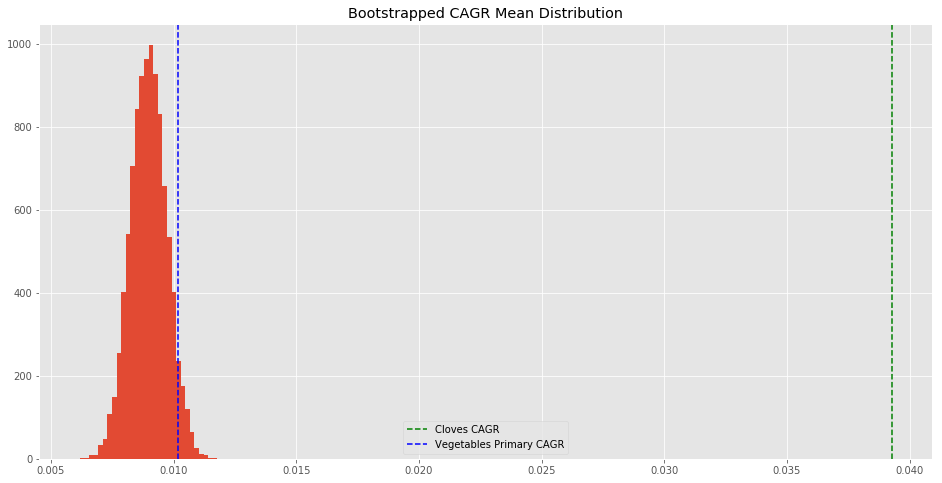

In [15]:
bootstrap_means = []
for i in range(10000):
    bootstrap = np.random.choice(df['cagr'], size=df.shape[0], replace=True)
    bootstrap_means.append(np.nanmean(bootstrap))
fig,ax = plt.subplots(figsize=(16,8))
plt.hist(bootstrap_means,bins=30)
ax.set(title='Bootstrapped CAGR Mean Distribution')
ax.axvline(df.loc['Cloves','cagr'],color='green',linestyle='--',label='Cloves CAGR')
ax.axvline(df.loc['Vegetables Primary','cagr'],color='blue',linestyle='--',label='Vegetables Primary CAGR')
ax.legend()